# OpenCV Bootcamp

## Table of Contents
- Reading an Image
- Checking Image Attributes (Datatype and Shape)
- Matrix Representation of an Image in Numpy
- Color Images and Splitting/Merging Image Channels
- Displaying Images using Matplotlib
- Saving Images

Import Libraries

In [135]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [136]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [137]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

In [138]:
# Display 18x18 pixel image.
Image(filename="opencv_bootcamp_assets_NB1/checkerboard_18x18.png")

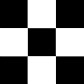

In [139]:
# Display 84x84 pixel image.
Image(filename="opencv_bootcamp_assets_NB1/checkerboard_84x84.jpg")

###  Reading Images using OpenCV  

OpenCV provides functionality to read various image formats (JPG, PNG, etc.) in different modes (grayscale, color, or with an alpha channel) using the `cv2.imread()` function.  

####  Syntax  
```python
retval = cv2.imread(filename[, flags])


In [140]:
# Read image as gray scale.
cb_img = cv2.imread("opencv_bootcamp_assets_NB1/checkerboard_18x18.png", 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

### Display Image attributes

In [141]:
# print the size  of image
print("Image size (H, W) is:", cb_img.shape)

# print data-type of image
print("Data type of image is:", cb_img.dtype)

Image size (H, W) is: (18, 18)
Data type of image is: uint8


### Display Images using Matplotlib

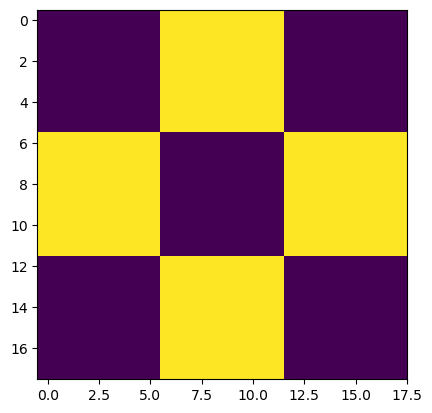

In [142]:
# Display image.
plt.imshow(cb_img)
plt.show()

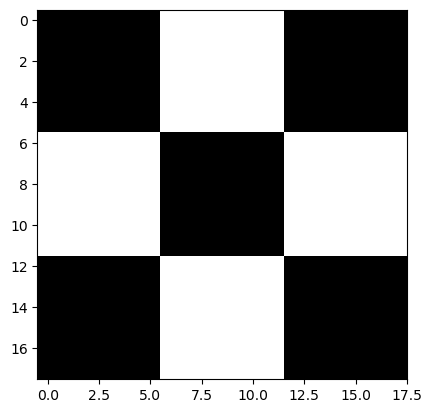

In [143]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")
plt.show()

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

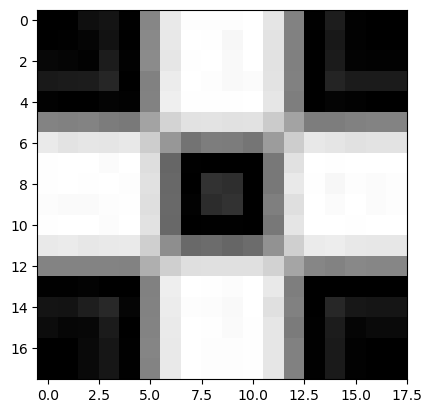

In [144]:
# Read image as gray scale.
cb_img_fuzzy = cv2.imread("opencv_bootcamp_assets_NB1/checkerboard_fuzzy_18x18.jpg", 0)

# print image
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy, cmap="gray")
plt.show()

### Working with Color Images

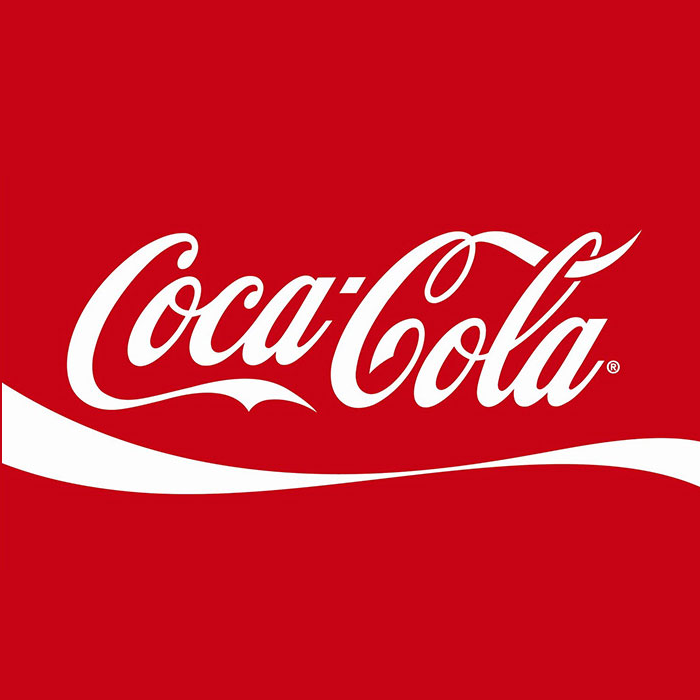

In [145]:
# Read and display Coca-Cola logo.
Image("opencv_bootcamp_assets_NB1/coca-cola-logo.png")

### Read and display color image

In [146]:
# Read in image
coke_img = cv2.imread("opencv_bootcamp_assets_NB1/coca-cola-logo.png", 1)

# print the size  of image
print("Image size (H, W, C) is:", coke_img.shape)

# print data-type of image
print("Data type of image is:", coke_img.dtype)

Image size (H, W, C) is: (700, 700, 3)
Data type of image is: uint8


### Display the Image

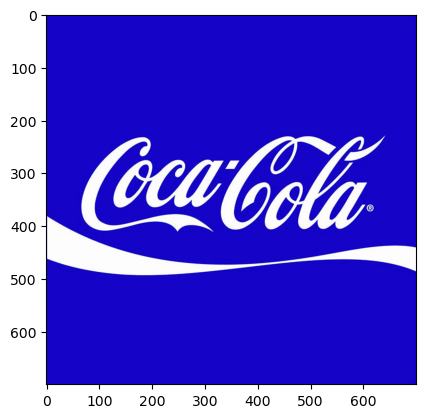

In [147]:
plt.imshow(coke_img)
plt.show()

##### The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

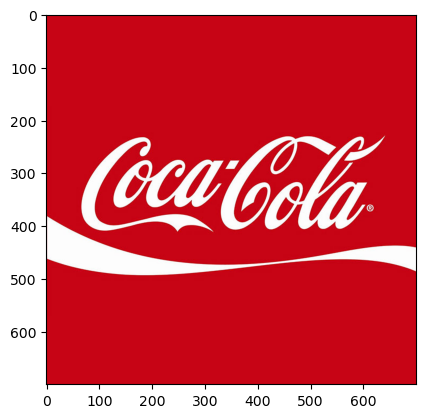

In [148]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)
plt.show()

### Splitting and Merging Color Channels
- **cv2.split()** Divides a multi-channel array into several single-channel arrays.

- **cv2.merge()** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

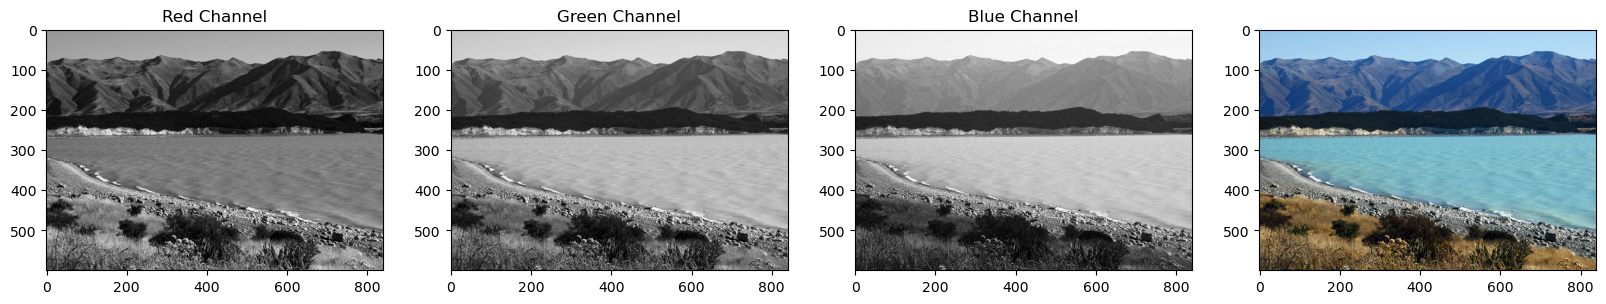

Text(0.5, 1.0, 'Merged Output')

In [149]:
img_NZ_bgr = cv2.imread("opencv_bootcamp_assets_NB1/New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.show()
plt.title("Merged Output")

#### Converting to Different Color Spaces  

The `cv2.cvtColor()` function in OpenCV is used to convert an image from one color space to another.  

In case of a transformation **to/from RGB color space**, the **order of the channels** should be explicitly specified (RGB or BGR).  

⚠ **Note:**  
- The default color format in OpenCV is **BGR**, not RGB.  
- In a standard **24-bit color image**, the first byte is **Blue**, the second is **Green**, and the third is **Red**.  

##### 🔹 Function Syntax  
```python
dst = cv2.cvtColor(src, code)


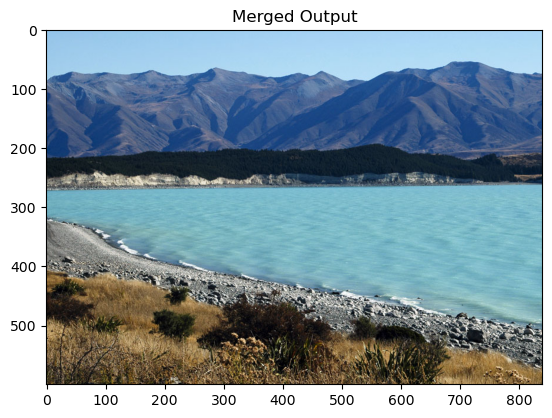

In [150]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)
plt.show()

#### Changing from BGR to RGB

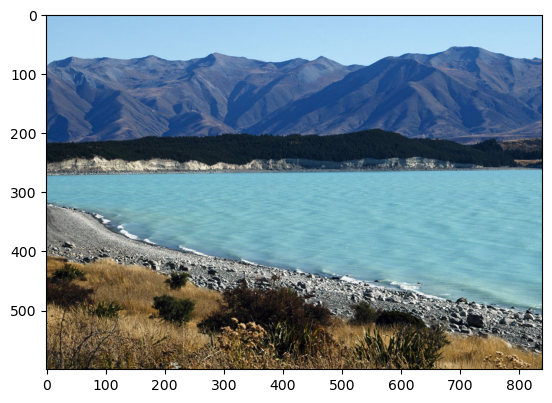

In [151]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)
plt.show()

#### Changing to HSV color space

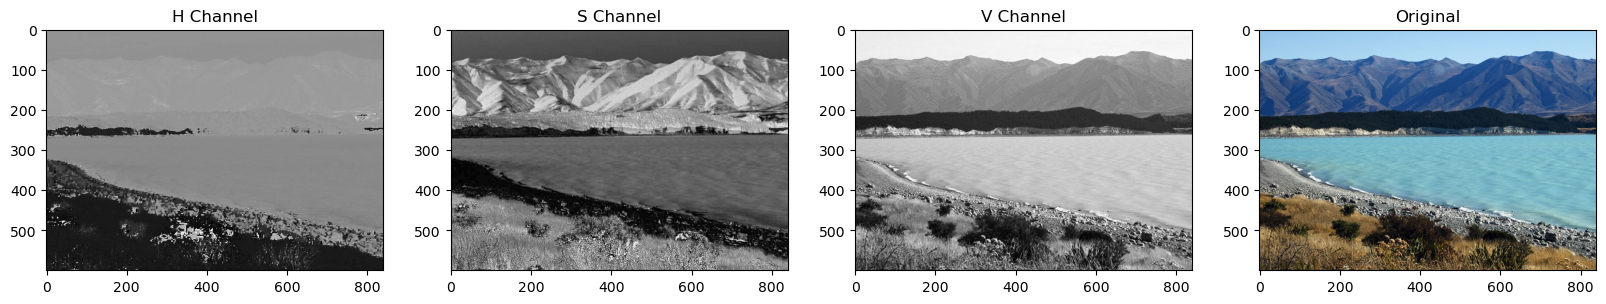

In [152]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");
plt.show()

#### Modifying individual Channel

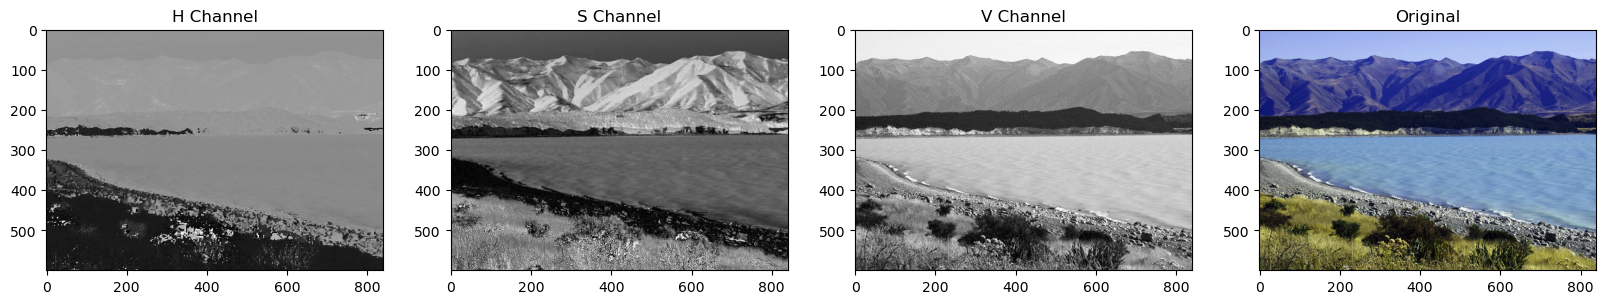

In [153]:
h_new = h + 10
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");
plt.show()

#### Saving Images
Saving the image is as trivial as reading an image in OpenCV. We use the function cv2.imwrite() with two arguments. The first one is the filename, second argument is the image object.

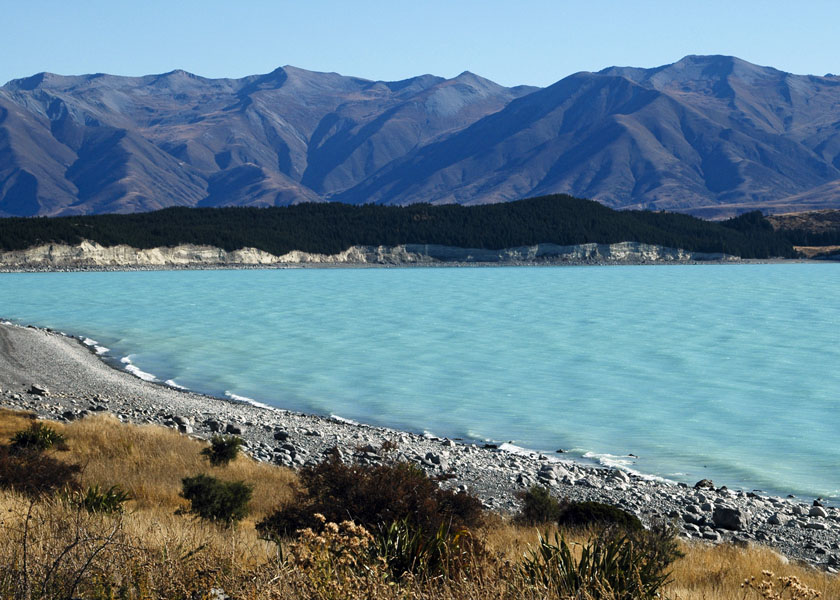

In [154]:
# save the image
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)

Image(filename='New_Zealand_Lake_SAVED.png') 

In [155]:
# read the image as Color
img_NZ_bgr = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is: (600, 840, 3)
img_NZ_gry shape (H, W) is: (600, 840)
